# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
medical = pd.read_csv('data/insurance2.csv')
imort 

In [11]:
medical.shape

(1338, 8)

In [12]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0,0.5,'number of occurences')

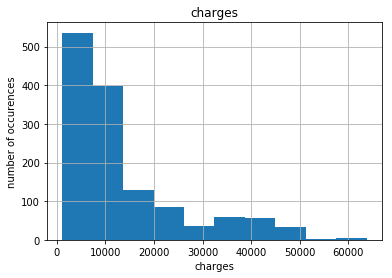

In [13]:
medical.hist('charges')
plt.xlabel('charges')
plt.ylabel('number of occurences')

In [14]:
sample_mean = np.mean(medical['charges'])
sample_mean

13270.422265141257

In [15]:
np.std(medical['charges'],ddof = 1)

12110.011236693994

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A__ There are two ways two answer.
1. Using CLT
We can randomly take >30 samples each time, calculate mean and repeat the process to have get a distribution of the mean of the samples. Per central limit theorem, the mean of such distribution should be equal to population mean. This would allow us to check if the population mean is <12000 or not.

This is implmented in the code below. One caveat of this process is that the population stdev is unknow for this problem, so standard deviation of the sample mean distrbution can not be accurately determines. 

But we can make an estimare of population stdev and then still get an approximate standard deviation for the sample mean distribution.

2. Using Confidence Interval
This is shown in answer for the next question

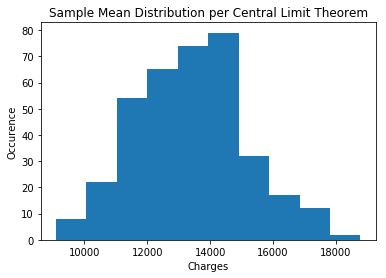

In [25]:
def random_sampler(n):
    return np.random.choice(medical['charges'], n)

seed(47)
# take your samples here
samplemean_trials =[]
for i in range(365):
    sample = random_sampler(50)
    samplemean_trials.append(np.mean(sample))
    
_ = plt.hist( samplemean_trials, bins=10)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Occurence')
_ = plt.title('Sample Mean Distribution per Central Limit Theorem')

In [27]:
print("per CLT, the distribution mean should be equal to population mean",np.mean(samplemean_trials))

per CLT, the distribution mean should be equal to population mean 13401.166592254684


In [ ]:
print("per CLT, standard deviation of the mean from sample mean distribution",np.mean(samplemean_trials))

In [40]:
print("stdev of the sample mean distribution",np.std(medical['charges'],ddof = 1)/np.sqrt(medical.shape[0]))

stdev of the sample mean distribution 331.06745431568226


__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:We can do a one sided confidence interval where the lowest value of the interval can be determined and then we can check if its above 12000 95% of the time

In [36]:
#Critical Value (sample>30), so we can apply normal distribution
population_std_estimate = np.std(medical['charges'],ddof = 1)
standard_err =  np.std(medical['charges'],ddof = 1)/np.sqrt(medical.shape[0])

In [37]:
margin_of_error = norm.ppf(0.95)*standard_err
margin_of_error

544.5575029967408

In [38]:
# 95% confident intervals of the mean
print("lower limit:",np.mean(medical['charges']) - margin_of_error)


lower limit: 12725.864762144516


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__Null hypothesis H0: People with insurance are charged the same amount as the people without insurance. We assume that H0 is true and then calculate the p_value and check if it lies below or above our significance level.
Alternative hypothesis: People with insurance are charged a different amount than the people with insurance.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [39]:

# Assume significane level i.e. Alpha of 0.05 as a threshold for the p-value
# Manual calculation
## Filter two samples from data set 
sample1= medical[medical['insuranceclaim']==1]['charges'] #data for  people with insurance
sample2= medical[medical['insuranceclaim']==0]['charges'] #data for people without insurance

n0= len(sample1)
n1= len(sample2)

x0= np.mean(sample1)
x1= np.mean(sample2)

s0= np.std(sample1, ddof=1)#estimate population stdev 

s1= np.std(sample2, ddof=1)#estimate population stdev


#calculate the pooled standard deviation
sp= np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))

#calculate the t test statistic
t_stat= (x0-x1)/(sp*np.sqrt(1/n0+1/n1))
print ('The t_stat for this distribution is: ', t_stat)

#Calculating the p-value using t.cdf and subtracting it from 1 because we want the area on the right 
p_value= 1-t.cdf(t_stat*sp, n0+n1-2)
print ('The pvalue for this distribution is: ', p_value)

The t_stat for this distribution is:  11.89329903087671
The pvalue for this distribution is:  0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [41]:
scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)

NameError: name 'scipy' is not defined

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test